In [1]:
from breakthrough_official_rules import *

Version:  0.3.15


In [2]:
from collections import deque
import random

def Q_move_with_replay(state, player, info):
    Q = info.Q
    last_state = info.last_state
    last_action = info.last_action
    learning = info.learning
    
    α = info.α
    ϵ = info.ϵ
    γ = info.γ
    batch_size = 32
    replay_frequency = 4
    replay=info.replay
    
        
    if state not in Q:
        actions = valid_moves(state, player)
        Q[state] = Table()
        for action in actions:
            Q[state][action] = 0
    
    # Choose move
    if learning:
        if random.random() < ϵ:
            move = random_move(state, player)
        else:
            move = top_choice(Q[state])
    else:
        move = top_choice(Q[state])
    
    # Store experience and learn
    if not last_action is None:
        reward = 0
        
        if learning:

            if replay:
                # Store experience in replay buffer
                experience = (last_state, last_action, reward, state)
                info.replay_buffer.append(experience)
            
            # Do immediate learning (optional - you could skip this)
            Q[last_state][last_action] += α * (reward + 
                γ * max([Q[state][a] for a in Q[state]]) - Q[last_state][last_action])

            if replay:
                # Experience replay learning
                info.step_count += 1
                if info.step_count % replay_frequency == 0 and len(info.replay_buffer) >= batch_size:
                    replay_learn(Q, info.replay_buffer, batch_size, α, γ)
    
    return move

def replay_learn(Q, replay_buffer, batch_size, α, γ):
    """Learn from a random batch of experiences"""
    batch = random.sample(replay_buffer, batch_size)
    
    for last_state, last_action, reward, next_state in batch:
        # Ensure both states exist in Q-table
        if last_state not in Q or next_state not in Q:
            continue
            
        # Q-learning update
        if next_state in Q and len(Q[next_state]) > 0:
            max_next_q = max([Q[next_state][a] for a in Q[next_state]])
        else:
            max_next_q = 0
            
        Q[last_state][last_action] += α * (reward + γ * max_next_q - Q[last_state][last_action])

In [9]:
agent1=Agent(Q_move_with_replay)
agent1.post=Q_after
agent1.Q=Table()
agent1.learning=True
agent1.replay=True
agent1.replay_buffer = deque(maxlen=400)
agent1.step_count=0

agent1.α=0.3  # learning rate
agent1.γ=0.9  # discount factor
agent1.ϵ=0.1  # random games sometimes for exploration

agent2=Agent(Q_move_with_replay)
agent2.post=Q_after
agent2.Q=Table()
agent2.learning=True
agent2.replay=True
agent2.replay_buffer = deque(maxlen=400)
agent2.step_count=0

agent2.α=0.3  # learning rate
agent2.γ=0.9  # discount factor
agent2.ϵ=0.1  # random games sometimes for exploration


In [10]:
iteration_count=0
percentage_won_player1=[]
percentage_won_player2=[]
percentage_stalemate=[]
number_of_iterations=[]

In [11]:
epoch_number=2000  # play 200 games, learning, and then test
N_test=100  # play 100 games, fixed skittles, see how well it does
N_train=50  # play 500 epochs, learning, changing skittles

total_number_of_games=epoch_number*N_train
total_number_of_games

100000

In [12]:
from tqdm.notebook import tqdm
from IPython.display import display,clear_output

In [13]:
from matplotlib import pyplot as plt

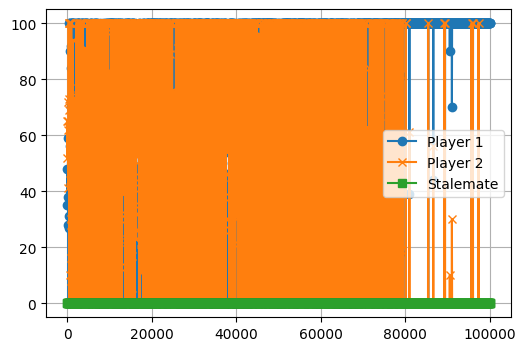

In [14]:
board_size=4

plt.close('all')
fig, ax = plt.subplots(figsize=(6, 4))
#plt.show(block=False)
try:
    
    for i in tqdm(range(epoch_number), desc="Updating plot", leave=True):
        # training step
        agent1.learning=True
        agent2.learning=True
    
        g=Game(number_of_games=N_train,N=board_size)
        g.display=False
        result=g.run(agent1,agent2)
    
        # testing step
        agent1.learning=False
        agent2.learning=False
    
        g=Game(number_of_games=N_test,N=board_size)
        g.display=False
        result=g.run(agent1,agent2)
    
        iteration_count+=N_train
    
    
        percentage_won_player1.append(result.count(1)/N_test*100)
        percentage_won_player2.append(result.count(2)/N_test*100)
        percentage_stalemate.append(result.count(0)/N_test*100)
        number_of_iterations.append(iteration_count)
    
        assert result.count(3)==0   # error on illegal games
    
        clear_output(wait=True)
        ax.cla()
        ax.grid(True)
        
        ax.plot(number_of_iterations,percentage_won_player1,'-o',label="Player 1")
        ax.plot(number_of_iterations,percentage_won_player2,'-x',label="Player 2")
        ax.plot(number_of_iterations,percentage_stalemate,'-s',label="Stalemate")
        ax.legend()
    
        fig.canvas.draw()
        fig.canvas.flush_events()
        plt.show()
        display(fig)

except KeyboardInterrupt:
    pass

## 3x3 chess rules without replay

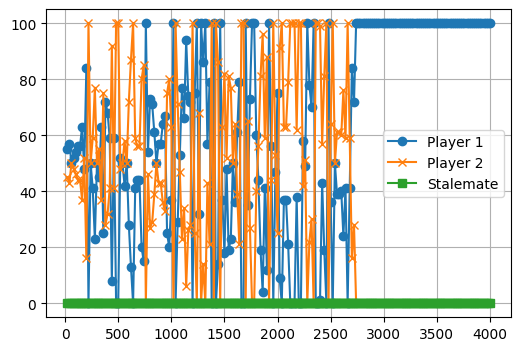

## 3x3 chess rules with replay

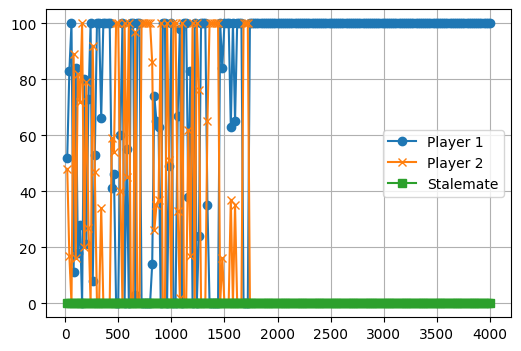

## 4x4 without replay

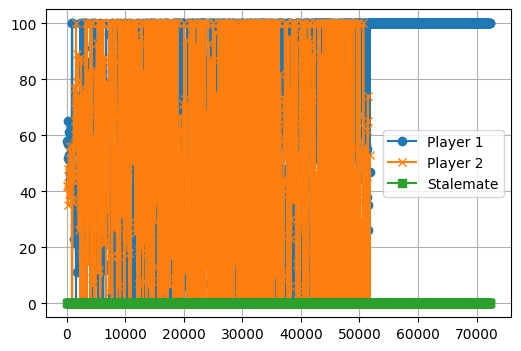